In [24]:
import numpy as np # линейная алгебра
import pandas as pd # обработка данных, работа с CSV файлами (например, pd.read_csv)

# Импортируем модуль os для работы с файловой системой
import os

# os.walk() позволяет рекурсивно проходить по дереву каталогов
for dirname, _, filenames in os.walk('/kaggle/input'):
    # Перебираем все файлы в текущем каталоге
    for filename in filenames:
        # Выводим полный путь к каждому файлу
        print(os.path.join(dirname, filename))

# Информация о сохранении и временных файлах:
# - Текущий рабочий каталог (/kaggle/working/) сохраняется при создании версии.
# - Временные файлы в /kaggle/temp/ не сохраняются за пределами текущей сессии.

## 1 Исследовательский анализ данных

In [26]:
import matplotlib.pyplot as plt # библиотека для создания графиков и визуализаций
import seaborn as sns # библиотека для статистической визуализации данных, построенная на основе matplotlib
import re # библиотека для работы с регулярными выражениями, полезная для текстовой обработки

# Магическая команда Jupyter Notebook для отображения графиков непосредственно в ноутбуке
%matplotlib inline

# Настройка Pandas для отображения полного содержимого ячеек в таблицах, без обрезки
pd.set_option('display.max_colwidth', None)

In [28]:
# Первая проверка данных

# Загрузка твитов из CSV файла в DataFrame
tweets_raw = pd.read_csv("/home/offyne/Загрузки/tweets_raw.csv")

# Вывод первых пяти строк DataFrame для первичного ознакомления с данными
display(tweets_raw.head())

# Вывод описательной статистики для числовых столбцов DataFrame
print(tweets_raw.describe())

# Вывод информации о DataFrame, включая количество ненулевых значений и типы данных
print(tweets_raw.info())

,Unnamed: 0.1,Unnamed: 0,Content,Location,Username,Retweet-Count,Favorites,Created at
0,0,0,innovate an innovative approach #quoteoftheday #DigitalMarketing #DigitalLearning #blogger https://t.co/fBHveP86Qw,NaN,PaulBillygraha1,0,0,2020-08-02 04:56:27
1,1,1,The pandemic is raising concerns about how teens use technology. But there’s still a lot we don’t know. \n\nREAD MORE: https://t.co/LnRfYWYGAz\n\n#ContinuingEducation #DigitalLearning #Education #EduTech #HigherEducation #Learning #LifelongLearning #Media #OnlineLearning #School* https://t.co/sDkeP2vVwu,Worldwide,IAM__Network,0,0,2020-08-02 04:49:43
2,2,2,STI: Staying Education-ready in the New Normal | Inquirer Technology \n\nREAD MORE: https://t.co/sF61JYGBTb\n\n#ContinuingEducation #DigitalLearning #Education #EduTech #HigherEducation #Learning #LifelongLearning #Media #OnlineLearning #School+ https://t.co/XbjNxpTjbe,Worldwide,IAM__Network,0,0,2020-08-02 04:32:36
3,3,3,Digital Learning Through Digital RCRT\n.\n.\nRegistration Opening Soon\nWebsite: https://t.co/DWAg4to5xX\n.\n.\n.\n.\n.\n#digitallearning #easylearning #digitalrcrt #rsvk #ssy #onlineeducation #effortlesslearning #onlinecourse https://t.co/PrGmfXy76b,NaN,digitalrcrt,0,0,2020-08-02 04:30:12
4,4,4,"Upswing Classroom: Out and Out Virtual School, Not Just a Classroom! - EdTechReview\nhttps://t.co/dXzzdoaDHH\n#education #edtech #educators #students #edchat #learning #teachers #classroom #DigitalLearning #Teachers",India,etr_in,1,0,2020-08-02 04:00:21


        Unnamed: 0.1     Unnamed: 0  Retweet-Count      Favorites
count  202645.000000  202645.000000  202645.000000  202645.000000
mean   101322.000000    5188.558232       1.354803       5.000518
std     58498.716987    4122.984479      19.532750      75.201292
min         0.000000       0.000000       0.000000       0.000000
25%     50661.000000    1680.000000       0.000000       0.000000
50%    101322.000000    4122.000000       0.000000       1.000000
75%    151983.000000    8167.000000       1.000000       2.000000
max    202644.000000   14999.000000    4070.000000   16174.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202645 entries, 0 to 202644
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0.1   202645 non-null  int64 
 1   Unnamed: 0     202645 non-null  int64 
 2   Content        202645 non-null  object
 3   Location       155123 non-null  object
 4   Username       202645 non-n

На первый взгляд, мы видим, что в DataFrame есть 202.645 твитов, включая содержимое, местоположение, имя пользователя, количество ретвитов, количество избранных и время создания. Также есть некоторые пропущенные значения в столбце Location.

Столбцы Unnamed: 0 и Unnamed: 0.1 неинформативны для нас, поэтому мы их опустим. Тип данных столбца Created at также должен быть datetime. Также нам нужно избавиться от дублирующихся твитов, если они есть.

---

In [32]:
# Нам не нужны первые два столбца. Давайте их удалим.
tweets_raw.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

# Удаление дублирующихся строк для обеспечения уникальности данных
tweets_raw.drop_duplicates(inplace=True)

# Преобразование типа столбца "Created at" в datetime для корректной работы с датами и временем
tweets_raw["Created at"] = pd.to_datetime(tweets_raw["Created at"])

# Вывод информации о датасете снова для проверки изменений
print(tweets_raw.info())

<class 'pandas.core.frame.DataFrame'>
Index: 187052 entries, 0 to 202642
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Content        187052 non-null  object        
 1   Location       142803 non-null  object        
 2   Username       187052 non-null  object        
 3   Retweet-Count  187052 non-null  int64         
 4   Favorites      187052 non-null  int64         
 5   Created at     187052 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.0+ MB
None


Количество твитов сократилось до 187.052 (было 15.593 дублированных строк). Созданный тип данных столбца также изменен на datatime64[ns]

In [34]:
# Вывод минимальной даты и времени из столбца "Created at"
print("С:", tweets_raw["Created at"].min())

# Вывод максимальной даты и времени из столбца "Created at"
print("До:", tweets_raw["Created at"].max())

С: 2020-07-23 23:51:34
До: 2020-08-14 05:43:52


In [38]:
# Заполнение пропущенных значений в столбце "Location" значением "unknown", присваивая результат обратно в столбец
tweets_raw["Location"] = tweets_raw["Location"].fillna("unknown")

# Вывод всех уникальных значений из столбца "Location"
print("Уникальные значения:", tweets_raw["Location"].unique())

# Вывод количества уникальных значений в столбце "Location"
print("Количество уникальных значений:", len(tweets_raw["Location"].unique()))

Уникальные значения: ['unknown' 'Worldwide' 'India' ... 'San Francisco - Daly City'
 '14041 Alief Clodine Rd' 'Washington, DC Area']
Количество уникальных значений: 37119


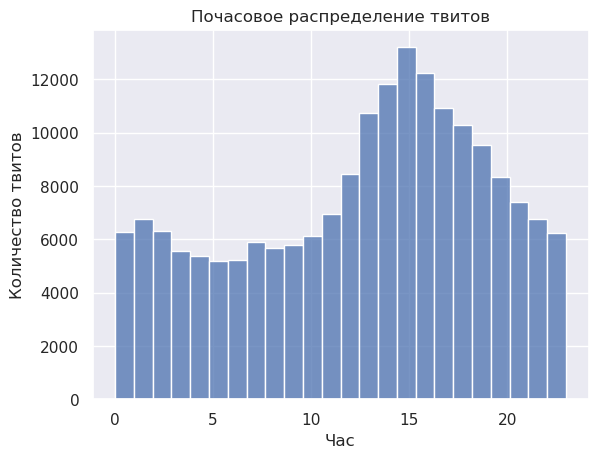

In [44]:
# Установка стиля seaborn
sns.set(style='darkgrid')

# Построение гистограммы часов
sns.histplot(tweets_raw["Created at"].dt.hour, bins=24, kde=False)
plt.title("Почасовое распределение твитов")
plt.xlabel("Час")
plt.ylabel("Количество твитов")
plt.show()

In [46]:
# Отображение самых популярных твитов
# Сортировка данных по столбцам "Favorites" и "Retweet-Count" в порядке убывания
# Вывод первых 20 строк с наиболее популярными твитами, включая их контент, количество ретвитов и лайков
display(
    tweets_raw.sort_values(by=["Favorites", "Retweet-Count"], axis=0, ascending=False)[["Content", "Retweet-Count", "Favorites"]].head(20)
)

,Content,Retweet-Count,Favorites
61138,"🤦🏿 UNESCO says 85% of children in sub-Saharan Africa are not learning.\n\nBut... if your children attend a religious or private school (e.g. a madrasa), it counts them as ""not learning.""\n\nAnd that's how official U.N. education statistics are produced. https://t.co/vKP0wM1ZYX",1189,16174
135212,kumulo dugo ko sa bagong content ng vincentiments. i get that online classes is not the ideal way to continue our education (trust me i hate the idea as well) pero entirely blaming teachers for doing what was asked of them is very wrong as well\n\n +++,2385,11457
35687,"Folks, the 12% VAT isn't just on Netflix, Lazada, etc. Pati po online trainings, e-learning facilities, webinars, payment facilities, conduits, so on will be under 12% VAT. Instead of pushing for online and contactless payments, mas gigipitin ang tao.",4070,9298
177239,Will start teaching online law school classes next week. 🤩\n\nGood luck to my students! 😈😇🤣,218,9204
95040,Q: Will there be special stages for the online concert?\nDahyun: Of course!\nTzuyu: There is,1171,8086
68460,You know what else schedule i'll be having on August..... my online class!! 🙃👏,1200,6260
82097,@MKBHD **Me attending my online class**\n\nMy family members behind me:- https://t.co/8sN3pF5NSc,536,6098
143207,"With this trying times caused by the pandemic, education has changed dramatically. As we transition to the usage of digital platforms for online learning, we aim to promote equal access of education. (1/5) https://t.co/76vFiFciWo",3266,5437
131616,The Georgia high school that became infamous for hallways crowded with unmasked students will temporarily go online after six students and three staffers tested positive COVID-19.\n\nThe district said it needs time to disinfect the school. https://t.co/nHK3O3rJAh,2094,4829
14127,1st week #distancelearning done. \n\nKey takeaways:\n\n1. Everything takes 3x longer.\n2. Tech is not a silver bullet. \n3. 1:5 = instructional min. : min. prep\n4. Kids are more polite than adults w/tech snafus. \n5. Use two screens.\n6. Expect the unexpected. \n7. Swear in your head.,885,4006


# 2 Feature Engineering
Теперь давайте удалим стоп-слова, хэштеги и знаки препинания в твитах и ​​токенизируем их. Для этого мы определим функцию.

In [62]:
# pip install nltk

NLTK (Natural Language Toolkit) — это библиотека на языке программирования Python, предназначенная для работы с естественным языком. Она предоставляет обширный набор инструментов и ресурсов для обработки, анализа и моделирования текстов на естественном языке. Вот основные возможности NLTK:

In [60]:
import nltk
nltk.download('punkt')    # Для токенизации
nltk.download('wordnet')  # Для лемматизации
nltk.download('stopwords') # Для стоп-слов

[nltk_data] Downloading package punkt to /home/offyne/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/offyne/nltk_data...
[nltk_data] Downloading package stopwords to /home/offyne/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

def process_tweets(tweet):
    # Удаление ссылок
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Удаление упоминаний и хэштегов
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Токенизация слов
    tokenized = word_tokenize(tweet)

    # Удаление стоп-слов
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Лемматизация слов
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Удаление неалфавитных символов и сохранение слов с тремя или более буквами
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized

# Загрузка данных из CSV файла
tweets_raw = pd.read_csv("/home/offyne/Загрузки/tweets_raw.csv", parse_dates=["Created at"])

# Обработка твитов и сохранение результата в новый столбец
tweets_raw["Processed"] = tweets_raw["Content"].str.lower().apply(process_tweets)

# Вывод первых пятнадцати строк столбца Processed
display(tweets_raw[["Processed"]].head(15))

,Processed
0,"[innovate, innovative, approach, quoteoftheday, digitalmarketing, digitallearning, blogger]"
1,"[pandemic, raising, concerns, teens, use, technology, still, lot, know, read, continuingeducation, digitallearning, education, edutech, highereducation, learning, lifelonglearning, media, onlinelearning, school]"
2,"[sti, staying, new, normal, inquirer, technology, read, continuingeducation, digitallearning, education, edutech, highereducation, learning, lifelonglearning, media, onlinelearning]"
3,"[digital, learning, digital, rcrt, registration, opening, soon, website, digitallearning, easylearning, digitalrcrt, rsvk, ssy, onlineeducation, effortlesslearning, onlinecourse]"
4,"[upswing, classroom, virtual, school, classroom, edtechreview, education, edtech, educators, students, edchat, learning, teachers, classroom, digitallearning, teachers]"
5,"[digital, future, needs, workforce, conversant, digital, medium, report, digitallearning, become, need, hour, expedited, process, uae, digitaltransformation, talentsolutions, talent, dubai]"
6,"[educational, technology, share, price, shareholders, holding, read, continuingeducation, digitallearning, education, edutech, highereducation, learning, lifelonglearning, media, onlinelearning, school]"
7,"[anaheim, public, schools, launch, virtual, academies, long, haul, read, continuingeducation, digitallearning, education, edutech, highereducation, learning, lifelonglearning, media, onlinelearning]"
8,"[new, oriental, education, amp, technology, group, edu, earnings, call, transcript, read, continuingeducation, digitallearning, education, edutech, highereducation, learning, lifelonglearning, media, onlinelearning, school]"
9,"[instructional, considerations, school, year, blendedlearning, remotelearning, distancelearning, hybridlearning, teachingonline, elearning, remoteteaching, digitallearning, teachertwitter, edutwitter, teachertips, teachhub, teachfromhome]"


---

преобразование текстовых данных в числовой формат, который можно использовать для анализа и моделирования

In [78]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Предположим, что ваши твиты уже обработаны и находятся в tweets_raw

def process_tweets(tweet):
    # Удаление ссылок
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Удаление упоминаний и хэштегов
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Токенизация слов
    tokenized = word_tokenize(tweet)
    # Удаление стоп-слов
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 
    # Лемматизация слов
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]
    # Удаление неалфавитных символов и сохранение слов с тремя или более буквами
    tokenized = [token for token in tokenized if token.isalpha() and len(token) > 2]
    return tokenized

# Предположим, что tweets_raw уже загружен и содержит колонку "Content"
# tweets_raw = pd.read_csv("/kaggle/input/tweets-processed/tweets_processed.csv", parse_dates=["Created at"])
tweets_raw["Processed"] = tweets_raw["Content"].str.lower().apply(process_tweets)

# Преобразуем каждый список токенов в строку
tweets_raw["Processed"] = tweets_raw["Processed"].apply(lambda tokens: ' '.join(tokens))

# Создаем список дополнительных стоп-слов
tfidf_stops = [
    "online", "class", "course", "learning", "learn", "teach", "teaching", "distance",
    "distancelearning", "education", "teacher", "student", "grade", "classes", "computer", "resource",
    "onlineeducation", "onlinelearning", "school", "students", "class", "virtual", "eschool", "thing",
    "virtuallearning", "educated", "educates", "teaches", "studies", "study", "semester", "elearning",
    "teachers", "lecturer", "lecture", "amp", "academic", "admission", "academician", "account", "action",
    "add", "app", "announcement", "application", "adult", "classroom", "system", "video", "essay", "training",
    "homework", "work", "assignment", "paper", "get", "math", "project", "science", "physics", "lesson", "schools",
    "courses", "assignments", "know", "instruction", "email", "discussion", "home", "college", "exam", "university",
    "use", "fall", "term", "proposal", "one", "review", "proposal", "calculus", "search", "research", "algebra",
    "internet", "remote", "remotelearning"
]

# Инициализация TF-IDF векторизатора
vectorizer = TfidfVectorizer(max_features=5000, stop_words=tfidf_stops)

# Применение векторизатора к данным
tfidf_matrix = vectorizer.fit_transform(tweets_raw["Processed"])

# Отображение полученной TF-IDF матрицы
display(tfidf_matrix)

<202645x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1943798 stored elements in Compressed Sparse Row format>

In [82]:
# pip install wordcloud

In [94]:
# Импортируем библиотеку wordcloud
from wordcloud import WordCloud

# Создаем новый DataFrame под названием frequencies
frequencies = pd.DataFrame(tfidf_matrix.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['total frequency'])

# Сортируем слова по частоте
frequencies.sort_values(by='total frequency', ascending=False, inplace=True)

# Отображаем 20 самых частотных слов
display(frequencies.head(20))

,total frequency
pay,2740.390521
help,2521.606869
new,2179.871451
like,2037.207912
free,2006.357182
need,1944.252858
time,1941.208186
kids,1934.404768
first,1895.320285
year,1842.058305


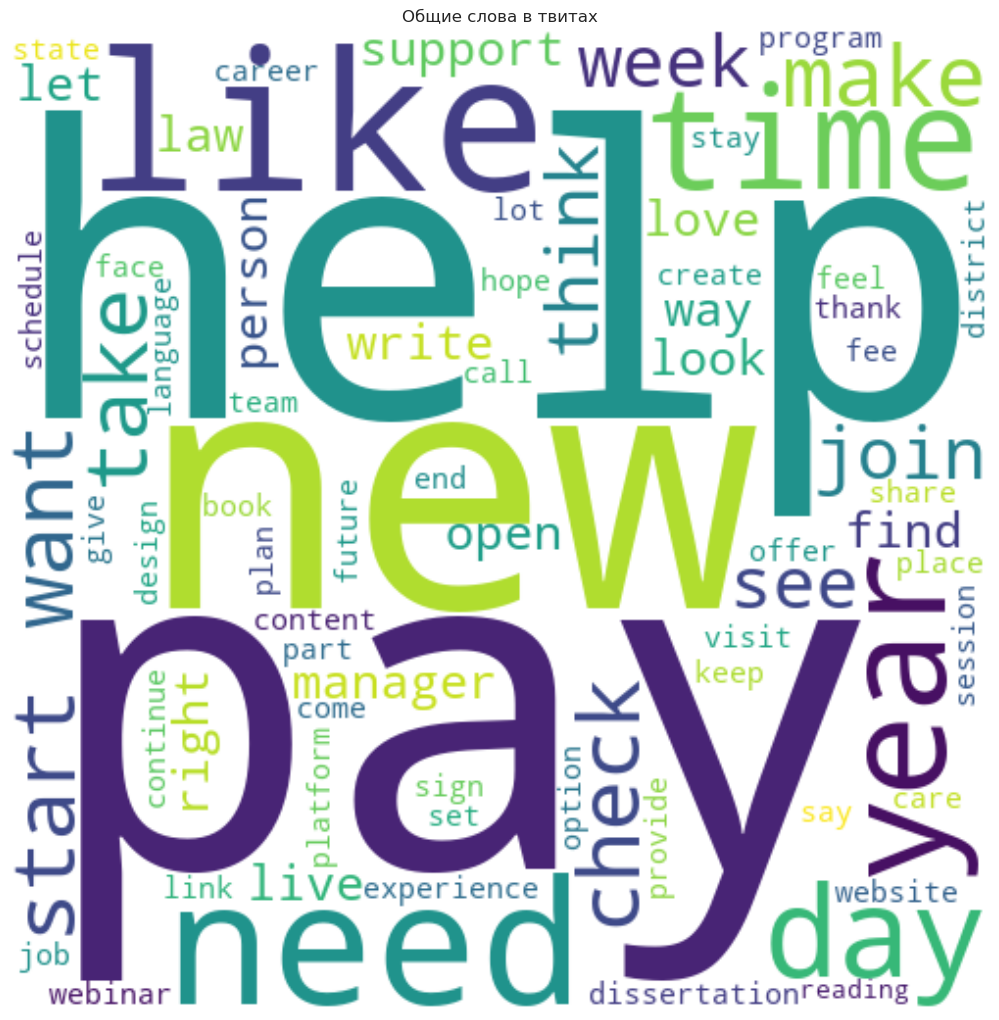

In [96]:
# Объединяем индексы
frequent_words = " ".join(frequencies.index) + " "

# Инициализация облака слов
wc = WordCloud(width=500, height=500, min_font_size=10, max_words=2000, background_color='white', stopwords=tfidf_stops)

# Генерация облаков слов для каждого типа метки
tweets_wc = wc.generate(frequent_words)

# Построение облака слов                     
plt.figure(figsize=(10, 10), facecolor=None) 
plt.imshow(tweets_wc, interpolation="bilinear") 
plt.axis("off") 
plt.title("Общие слова в твитах")
plt.tight_layout(pad=0) 
plt.show()

In [98]:
# Получаем длину твитов
tweets_raw["Length"] = tweets_raw["Content"].str.len()

# Получаем количество слов в твитах
tweets_raw["Words"] = tweets_raw["Content"].str.split().str.len()

# Отображаем новые столбцы
display(tweets_raw[["Length", "Words"]])

,Length,Words
0,114,9
1,300,32
2,265,24
3,240,26
4,213,24
...,...,...
202640,293,30
202641,246,36
202642,248,31
202643,155,13


определяем функцию под названием get_countries, которая возвращает коды стран для заданных локаций

In [101]:
# pip install pycountry

In [130]:
import pycountry

def get_countries(location):
    # Проверяем, является ли значение строкой
    if not isinstance(location, str):
        return "unknown"
    
    # Приводим название локации к нижнему регистру и убираем лишние пробелы
    location = location.strip().lower()

    # Проверяем, является ли локация названием страны
    country = pycountry.countries.get(name=location.title())  # Используем title() для корректного сравнения
    if country:
        return country.alpha_2
    
    # Проверяем, является ли локация названием субделения
    try:
        subdivisions = pycountry.subdivisions.lookup(location)  # Получаем субделение
        if isinstance(subdivisions, set):  # Если возвращается множество
            # Извлекаем код страны из каждого элемента
            country_codes = {subdivision.country_code for subdivision in subdivisions}
            return list(country_codes)[0] if country_codes else "unknown"  # Возвращаем первый код страны или "unknown"
        else:  # Если это не множество, значит это объект
            return subdivisions.country_code  # Получаем код страны
    except LookupError:
        pass  # Если ничего не найдено, просто продолжаем

    return "unknown"  # Если ни страна, ни субделение не найдены

# Применяем функцию к столбцу "Location" и сохраняем результаты в новом столбце "Country"
tweets_raw["Country"] = tweets_raw["Location"].apply(get_countries)

# Печатаем уникальные значения в новом столбце "Country"
print(tweets_raw["Country"].unique())

# Печатаем количество уникальных значений в столбце "Country"
print("Количество уникальных значений:", len(tweets_raw["Country"].unique()))

['unknown' 'IN' 'ES' 'US' 'GB' 'ZM' 'GH' 'FI' 'ZA' 'SG' 'NP' 'FR' 'MC'
 'BD' 'IL' 'LR' 'NG' 'CA' 'GE' 'PK' 'DK' 'AE' 'LU' 'NO' 'SE' 'LB' 'TR'
 'AU' 'QA' 'VI' 'IE' 'JM' 'DE' 'HK' 'TH' 'BE' 'MY' 'PH' 'AG' 'MD' 'UG'
 'BS' 'DO' 'MA' 'LA' 'GI' 'IQ' 'NZ' 'MX' 'KH' 'LT' 'LK' 'CI' 'CO' 'EG'
 'KE' 'NI' 'IT' 'GD' 'GT' 'BG' 'PT' 'SA' 'NL' 'HU' 'MN' 'UA' 'HR' 'TZ'
 'AZ' 'HN' 'ZW' 'GR' 'CR' 'CH' 'AR' 'KW' 'SL' 'MT' 'NA' 'CM' 'PG' 'HT'
 'CN' 'GU' 'UZ' 'TC' 'TN' 'ID' 'AQ' 'BW' 'SS' 'AT' 'TT' 'CY' 'BH' 'KG'
 'NR' 'BT' 'GA' 'BR' 'BN' 'CU' 'AW' 'MW' 'SV' 'OM' 'BF' 'SI' 'SC' 'KN'
 'DM' 'EC' 'PA' 'EE' 'JP' 'RW' 'BB' 'PE' 'CW' 'RO' 'LS' 'PR' 'PL' 'CL'
 'UY' 'JO' 'AF' 'PS' 'SK' 'BM' 'KM' 'MV' 'TW' 'SD' 'PY' 'CG' 'GG' 'AL'
 'SB' 'MP' 'KR' 'NE' 'MK' 'ET' 'BJ' 'JE' 'KZ' 'NC' 'GM' 'VC' 'AM' 'DZ'
 'SM' 'LV' 'YE' 'TO' 'GY' 'MG' 'BZ' 'ME' 'MU' 'FJ' 'LI' 'IS' 'LY' 'LC'
 'BA' 'SN' 'IM']
Количество уникальных значений: 170


In [150]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

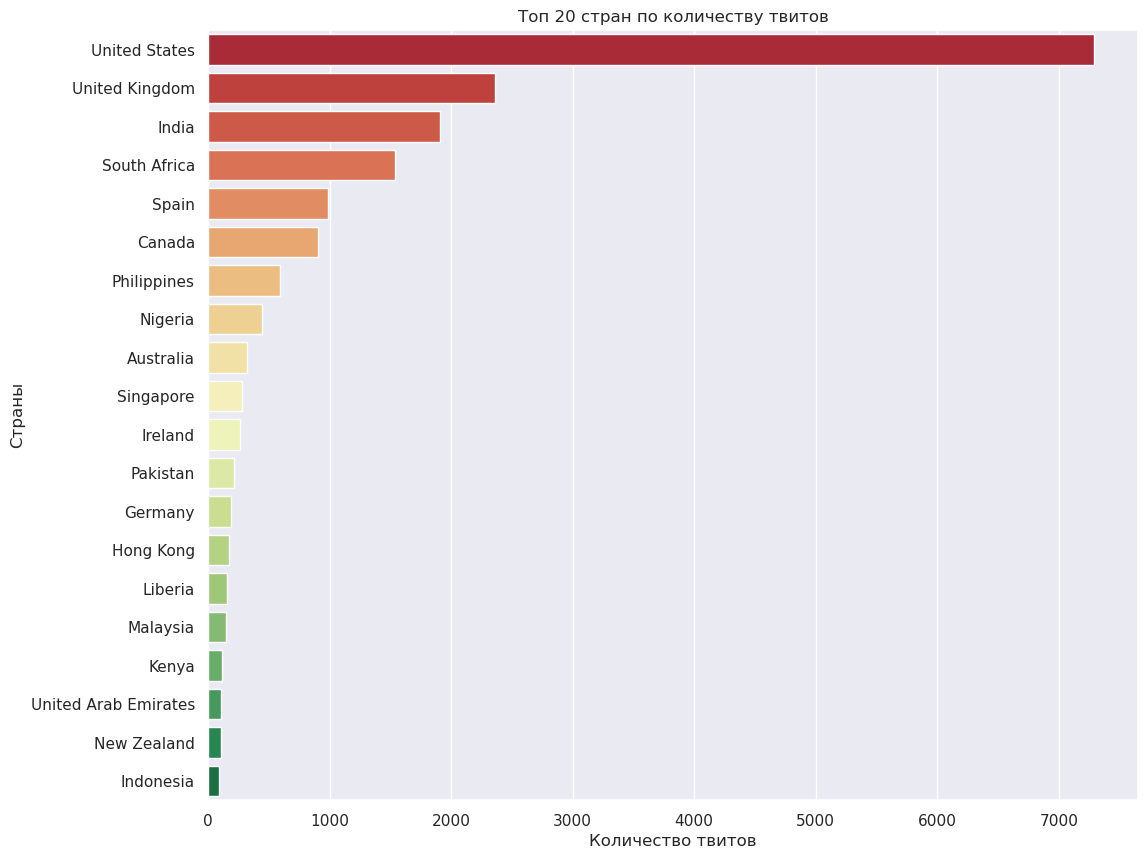

In [148]:
# Исключаем записи с меткой "unknown" в столбце Country
countries = tweets_raw[tweets_raw.Country != 'unknown']

# Выбираем 20 стран с наибольшим количеством твитов
top_countries = countries["Country"].value_counts(sort=True).head(20)

# Преобразуем двухбуквенные коды стран в полные названия и сохраняем в список
country_fullnames = []
for alpha2 in top_countries.index:
    country = pycountry.countries.get(alpha_2=alpha2)
    if country:
        country_fullnames.append(country.name)
    else:
        country_fullnames.append("Неизвестная страна")  # Если страна не найдена

# Визуализируем топ-20 стран
plt.figure(figsize=(12, 10))
sns.barplot(y=country_fullnames, x=top_countries, orient="h", palette="RdYlGn")
plt.xlabel("Количество твитов")
plt.ylabel("Страны")
plt.title("Топ 20 стран по количеству твитов")
plt.show()

# 3 Sentiment Analysis
Анализ настроений (или Sentiment Analysis) — это процесс определения и извлечения субъективной информации из текста. Основная цель анализа настроений — выяснить, каково общее настроение или эмоциональное состояние, выраженное в тексте, например, положительное, отрицательное или нейтральное. Этот метод широко используется в различных областях, включая маркетинг, социальные исследования и анализ отзывов.

После предварительной обработки и разведывательного анализа данных (EDA) мы наконец можем сосредоточиться на нашей основной цели в этом проекте. Мы собираемся вычислить эмоциональные характеристики твитов, такие как полярность и субъективность, с использованием библиотеки TextBlob.

Она предоставляет нам эти значения, используя заранее определенные оценки слов. Вы можете ознакомиться с документацией для получения дополнительной информации.

Полярность — это значение, которое изменяется от -1 до 1. Оно показывает, насколько положительным или отрицательным является данное предложение.

Субъективность — это другое значение, которое изменяется от 0 до 1 и показывает, относится ли предложение к факту или мнению (объективное или субъективное).



In [154]:
# pip install textblob

In [160]:
# Импортируем библиотеку TextBlob для анализа текстов
from textblob import TextBlob

# Загрузка предварительно обработанных данных из CSV файла
tweets_raw = pd.read_csv("/home/offyne/Загрузки/tweets_sentiments.csv", parse_dates=["Created at"])

# Исключаем строки, где нет полярности и субъективности, если такие есть
# Если вы хотите добавить полярность и субъективность, раскомментируйте следующий код:

# Добавляем полярность и субъективность в DataFrame с использованием TextBlob
tweets_raw["Polarity"] = tweets_raw["Processed"].apply(lambda word: TextBlob(word).sentiment.polarity)
tweets_raw["Subjectivity"] = tweets_raw["Processed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)


# Отображаем первые 10 значений в столбцах Полярность и Субъективность
display(tweets_raw[["Polarity", "Subjectivity"]].head(10))

,Polarity,Subjectivity
0,0.500000,1.000000
1,0.000000,0.000000
2,0.143182,0.552273
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.041667
6,0.250000,0.250000
7,-0.025000,0.233333
8,0.136364,0.454545
9,0.000000,0.000000


Классифицируем полярности, если:

- полярность > 0 --> положительная
- полярность = 0 --> нейтральная
- полярность < 0 --> отрицательная

In [163]:
# Определяем функцию для классификации полярностей
def analyse_polarity(polarity):
    # Проверяем, является ли входное значение числом
    if not isinstance(polarity, (int, float)):
        return "Unknown"  # Если не число, возвращаем "Неизвестно"
    
    # Если полярность больше 0, возвращаем "Положительная"
    if polarity > 0:
        return "Positive"
    # Если полярность равна 0, возвращаем "Нейтральная"
    elif polarity == 0:
        return "Neutral"
    # Если полярность меньше 0, возвращаем "Отрицательная"
    else:
        return "Negative"

# Применяем функцию к столбцу Polarity и добавляем результаты в новый столбец Label
tweets_raw["Label"] = tweets_raw["Polarity"].apply(analyse_polarity)

# Отображаем анализ полярности и субъективности
display(tweets_raw[["Label"]].head(10))

,Label
0,Positive
1,Neutral
2,Positive
3,Neutral
4,Neutral
5,Neutral
6,Positive
7,Negative
8,Positive
9,Neutral


In [165]:
# Выводим количество уникальных значений в столбце Label
# Функция value_counts() возвращает количество вхождений каждого уникального значения
label_counts = tweets_raw["Label"].value_counts()

# Отображаем результаты в читабельном формате
print("Количество уникальных меток:")
print(label_counts)

Количество уникальных меток:
Label
Positive    100794
Neutral      57060
Negative     29198
Name: count, dtype: int64


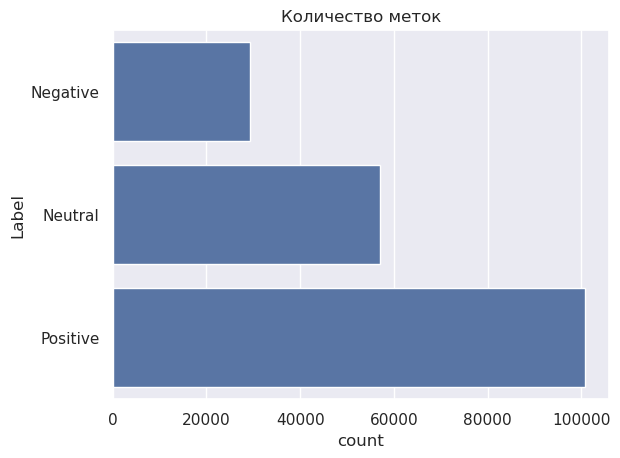

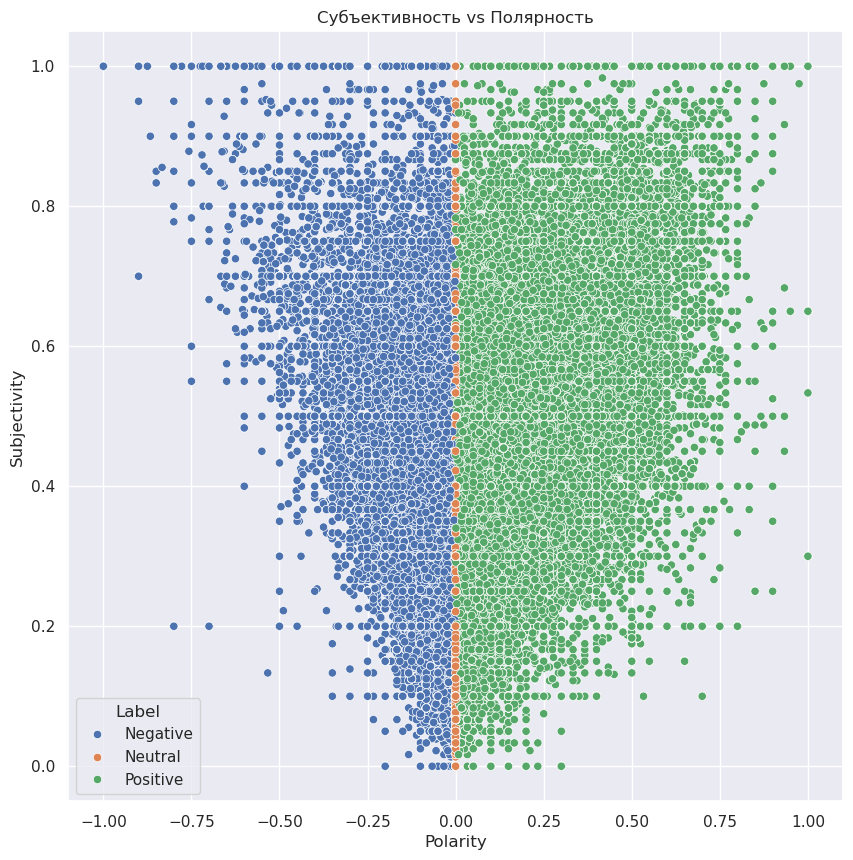

In [167]:
# Изменяем тип данных столбца Label на "категория"
# Это поможет в оптимизации памяти и улучшит производительность при анализе данных
tweets_raw["Label"] = tweets_raw["Label"].astype("category")

# Визуализируем количество меток с помощью countplot
sns.countplot(tweets_raw["Label"])
plt.title("Количество меток")  # Заголовок графика
plt.show()  # Отображаем график

# Визуализируем оценки полярности и субъективности
plt.figure(figsize=(10, 10))  # Устанавливаем размер графика
# Создаем диаграмму рассеяния для полярности и субъективности, цвет по меткам
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=tweets_raw)
plt.title("Субъективность vs Полярность")  # Заголовок графика
plt.show()  # Отображаем график

Поскольку анализ на основе лексикона не всегда надежен, нам необходимо проверить результаты вручную. Давайте посмотрим на популярные (в терминах ретвитов и избранных) твиты с самыми высокими и низкими оценками полярности.

In [170]:
# Отображаем положительные твиты
# Сортируем по полярности (по убыванию), количеству избранных (по убыванию) и количеству ретвитов (по убыванию)
# Это позволяет выделить наиболее популярные положительные твиты
display(tweets_raw.sort_values(by=["Polarity", "Favorites", "Retweet-Count"], axis=0, ascending=[False, False, False])[
    ["Content", "Retweet-Count", "Favorites", "Polarity"]
].head(20))

# Отображаем отрицательные твиты
# Сортируем по полярности (по возрастанию), количеству избранных (по убыванию) и количеству ретвитов (по убыванию)
# Это позволяет выделить наиболее популярные отрицательные твиты
display(tweets_raw.sort_values(by=["Polarity", "Favorites", "Retweet-Count"], axis=0, ascending=[True, False, False])[
    ["Content", "Retweet-Count", "Favorites", "Polarity"]
].head(20))

,Content,Retweet-Count,Favorites,Polarity
79375,@jyrzyap Please tell your classmate. They are very grateful because they have all the equipments in online class. Despite of walang walang gamit ang Teacher niyo. He is doing his best to provide the information needed in your class. Not all Teachers can afford equipments for online class.,65,1286,1.0
84334,omgggg my best fren is in the same online class as me!!!!!,0,257,1.0
13538,Yes! I am making #STEM #STEAM kits for 786 Ss for #distancelearning! Why? Bc #kidsdeserveit! No #bigfrickinpackets! No #workshits! I want to be the best #Teachers for my Ss! @HRussell_STEAM 🎉 https://t.co/6DexYdQuz8,24,245,1.0
177093,I want best online teaching techniques and I will pay for it.\n\nI don't want my career to be idling on streets of MUMBAI.\n\nI am Indian Seafarer.,34,214,1.0
173038,"What works best in the classroom is what works best online, and that’s not passive learning. https://t.co/YJfmN5Qc3C via @slate",60,146,1.0
177947,Some awesome tips for teaching online via @kasal_finley! https://t.co/IzOng1pd6l,66,134,1.0
159192,My partner prepping their online class this semester. I have no idea what’s happening in this system but I’m impressed by their dedication. 😂 #AcademicTwitter https://t.co/nt6shZh8dm,6,133,1.0
38436,Learning Never Exhausts the Mind! Do you know which is the best Indian E-Learning App? Stay tuned to find out tomorrow (7th Aug 2020) at 12 Noon. #AatmaNirbharApp https://t.co/db4dUsZcai,31,118,1.0
160339,"@Kamogelo_MN I hope that we write online examinations even in 2nd semester .Some of us want law firms to be fighting for us once we finish our degrees😂😁 cheers to 10 distinctions ,2020 is our year .#unisa .y'all don't stand a chance against .Unisa produces Di best law attorneys in SA https://t.co/koJjQk0YsW",3,107,1.0
172629,"The #DistanceLearning Playbook book clubs with @CorwinPress for #teachers &amp; leaders start this week. Join @NancyFrey and me as we discuss research-based best teaching, assessment, &amp; planning practices for online classrooms. #edchat\nLearn more &amp; register: https://t.co/ooQZGpGrdW https://t.co/1ClpB9vTYD",35,102,1.0


,Content,Retweet-Count,Favorites,Polarity
59203,I made doodles of @ATiredShota’s mcyt apoc au cause online class is boring https://t.co/ys9A6tNp8q,12,218,-1.0
145606,I’m horrible at remembering to do online assignments so y’all pray for me this semester 🥺,28,66,-1.0
30682,"I want job tog. Ondahala iilonga aaholike,. This e-learning thing is boring mahn",2,47,-1.0
170877,Exams bhi leni hai... \nDuty bhi karvani hai... \nAur fees bhi leni hai.. \n\nAise kese chalega... \n\nAnd after all this insane things they are telling that we are teaching you through online classes!!! \n\n#saynotofees \n#nowornever,24,44,-1.0
81167,Online class is boring and all until one of your Saraiki classmates leave the mic opened,2,41,-1.0
59327,online class is soOO0 BORING,2,20,-1.0
73179,dafaq online class is so boring 😔,1,16,-1.0
34200,Teacher coming out against teaching. They are basically the only ones in favor of e-learning.\n\nThey are pathetic.,0,14,-1.0
151038,All my classes are online this semester and I might go insane 😀,0,14,-1.0
72973,drew an anime version of grim reaper during online class 😗✌️ https://t.co/NVuvwJhiPk,1,13,-1.0


Похоже, нам удалось успешно обозначить полярности. Давайте проверим положительные и отрицательные твиты по странам. Теперь мы можем создать облака слов для положительных и отрицательных твитов, чтобы понять, что людям нравится, а что нет.

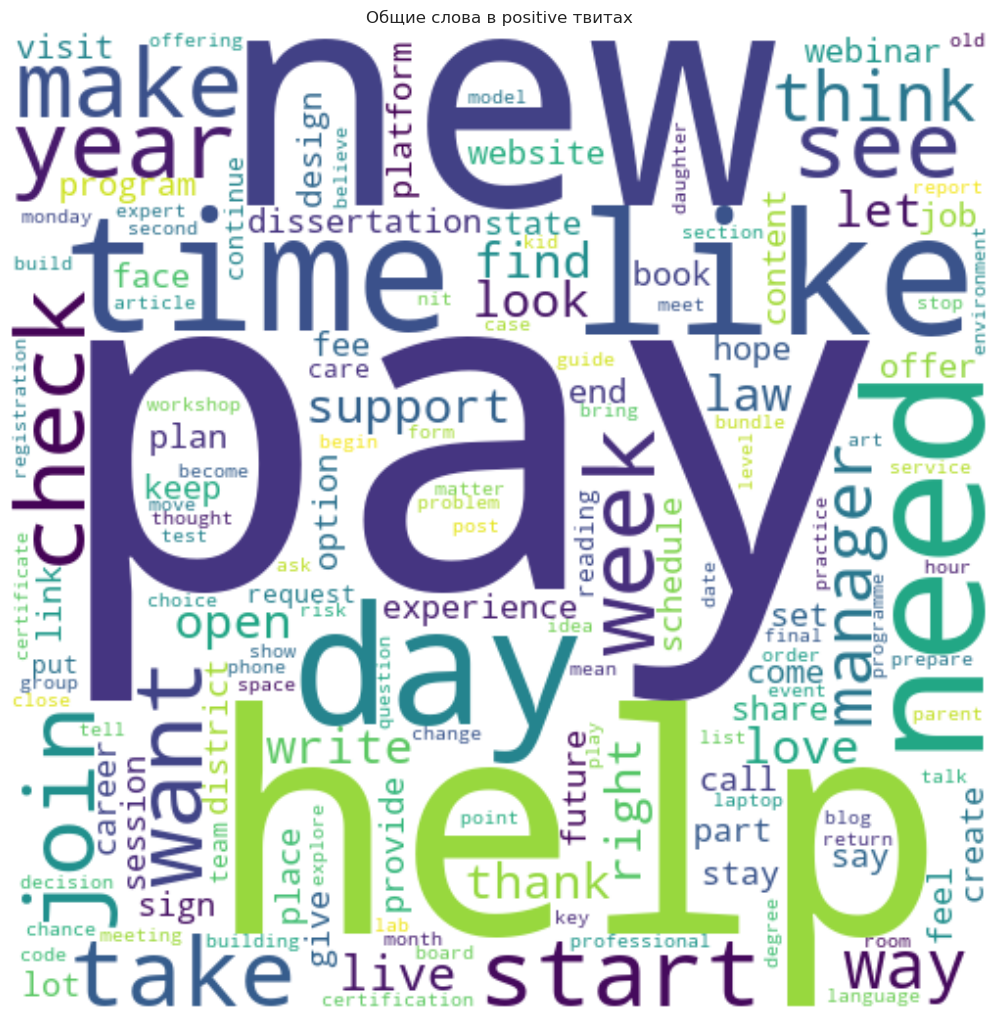

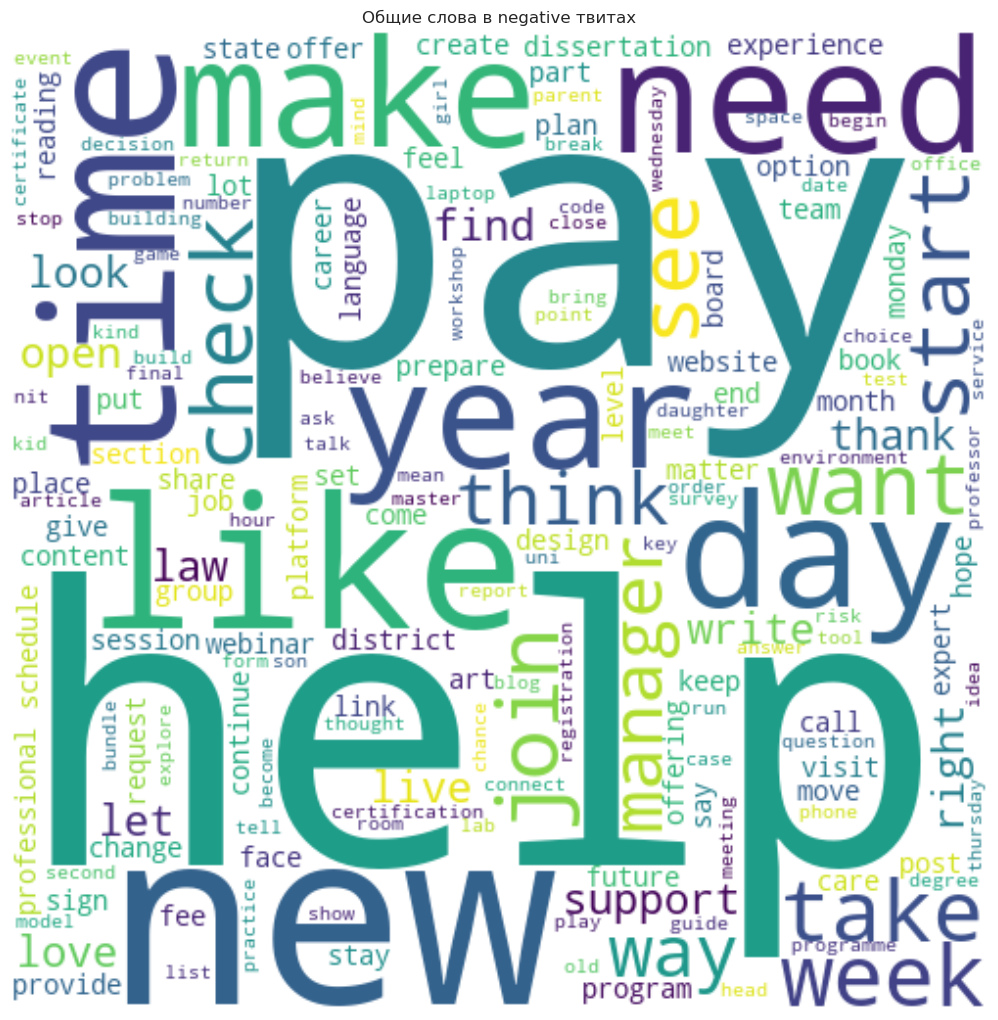

In [173]:
def make_wordcloud(data, label):
    # Инициализируем векторизатор Tf-idf
    polarity_vectorizer = TfidfVectorizer(max_features=5000, stop_words=tfidf_stops)

    # Подгоняем и преобразуем векторизатор
    tfidf_matrix_polarity = polarity_vectorizer.fit_transform(tweets_raw["Processed"])

    # Создаем новый DataFrame под названием frequencies
    frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T, index=polarity_vectorizer.get_feature_names_out(), columns=['total frequency'])

    # Сортируем слова по частоте
    frequencies_polarity.sort_values(by='total frequency', ascending=False, inplace=True)

    # Объединяем индексы
    frequent_words_polarity = " ".join(frequencies_polarity.index) + " "

    # Инициализируем облако слов
    wc = WordCloud(width=500, height=500, min_font_size=10, max_words=2000, background_color='white', stopwords=tfidf_stops)

    # Генерируем облака слов для каждого типа метки
    tweets_polarity = wc.generate(frequent_words_polarity)

    # Рисуем облако слов                     
    plt.figure(figsize=(10, 10), facecolor=None) 
    plt.imshow(tweets_polarity, interpolation="bilinear") 
    plt.axis("off") 
    plt.title("Общие слова в " + label + " твитах")
    plt.tight_layout(pad=0) 
    plt.show() 

# Создаем DataFrame для каждой метки
positive_popular_df = tweets_raw.sort_values(by=["Polarity", "Favorites", "Retweet-Count"], axis=0, ascending=[False, False, False])[["Content", "Retweet-Count", "Favorites", "Polarity", "Processed"]].head(50)
negative_popular_df = tweets_raw.sort_values(by=["Polarity", "Favorites", "Retweet-Count"], axis=0, ascending=[True, False, False])[["Content", "Retweet-Count", "Favorites", "Polarity", "Processed"]].head(50)

# Вызываем функцию для положительных твитов
make_wordcloud(positive_popular_df, "positive")
# Вызываем функцию для отрицательных твитов
make_wordcloud(negative_popular_df, "negative")

Давайте посмотрим на количество положительных и отрицательных твитов по странам.

Положительные твиты:

Country
US    1319
GB     227
IN     177
CA     126
ES      88
      ... 
JO       0
KG       0
KH       0
KN       0
YE       0
Name: count, Length: 154, dtype: int64

Отрицательные твиты:

Country
US    3343
GB    1424
ZA    1187
IN     897
CA     461
      ... 
AZ       0
AW       0
AM       0
AL       0
SM       0
Name: count, Length: 154, dtype: int64


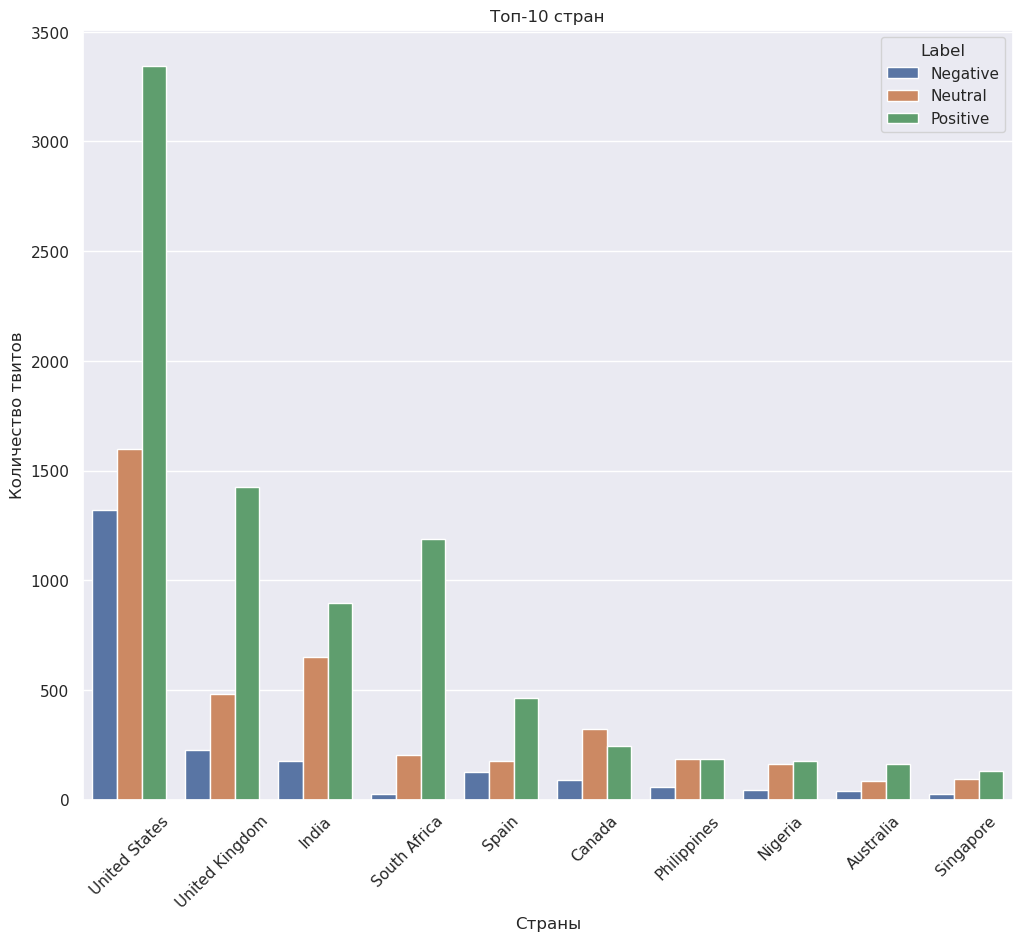

In [176]:
# Получаем количество положительных и отрицательных твитов по странам
# Исключаем записи с неизвестной страной для более точного анализа
positives_by_country = tweets_raw[tweets_raw.Country != 'unknown'].groupby("Label")["Country"].value_counts().Negative.sort_values(ascending=False)
negatives_by_country = tweets_raw[tweets_raw.Country != 'unknown'].groupby("Label")["Country"].value_counts().Positive.sort_values(ascending=False)

# Выводим результаты
print("Положительные твиты:\n")
print(positives_by_country)  # Показываем количество положительных твитов по странам
print("\nОтрицательные твиты:\n")
print(negatives_by_country)  # Показываем количество отрицательных твитов по странам

# Создаем маску для топ-10 стран (по количеству твитов)
mask = tweets_raw["Country"].isin(top_countries.index[:10]).values

# Создаем новый DataFrame, который включает только топ-10 стран
top_20df = tweets_raw.iloc[mask, :]

# Визуализируем топ-10 стран
plt.figure(figsize=(12, 10))  # Устанавливаем размер графика
sns.countplot(x="Country", hue="Label", data=top_20df, order=top_20df["Country"].value_counts().index)
plt.xlabel("Страны")  # Подпись для оси X
locs, labels = plt.xticks()  # Получаем текущее положение меток
plt.xticks(locs, country_fullnames[:10])  # Заменяем метки стран на полные названия
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.ylabel("Количество твитов")  # Подпись для оси Y
plt.title("Топ-10 стран")  # Заголовок графика
plt.show()  # Отображаем график

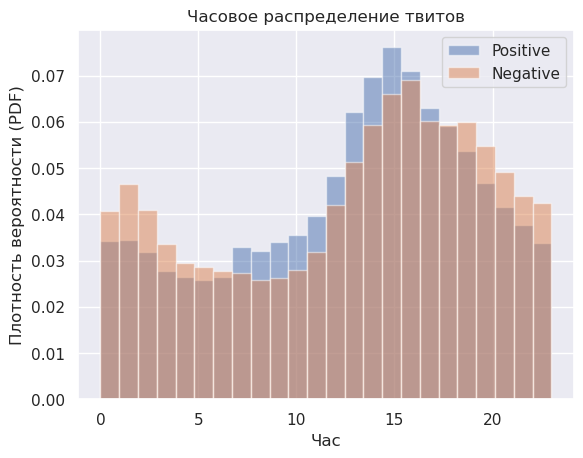

In [178]:
# Извлекаем часы создания положительных твитов
positive = tweets_raw.loc[tweets_raw.Label == "Positive"]["Created at"].dt.hour
# Извлекаем часы создания отрицательных твитов
negative = tweets_raw.loc[tweets_raw.Label == "Negative"]["Created at"].dt.hour

# Строим гистограмму для положительных твитов
plt.hist(positive, alpha=0.5, bins=24, label="Positive", density=True)  # alpha - прозрачность, bins - количество интервалов
# Строим гистограмму для отрицательных твитов
plt.hist(negative, alpha=0.5, bins=24, label="Negative", density=True)  # density=True нормализует значения

plt.xlabel("Час")  # Подпись для оси X
plt.ylabel("Плотность вероятности (PDF)")  # Подпись для оси Y
plt.title("Часовое распределение твитов")  # Заголовок графика
plt.legend(loc='upper right')  # Легенда графика, размещенная в верхнем правом углу
plt.show()  # Отображаем график

Гистограмма выше демонстрирует, что между временем и полярностью твитов нет взаимосвязи

In [196]:
from sklearn.preprocessing import LabelEncoder

# Предположим, что tweets_processed уже загружен и содержит столбцы "Label" и "Processed"

# Кодируем метки с использованием LabelEncoder
le = LabelEncoder()
tweets_raw["Label_enc"] = le.fit_transform(tweets_raw["Label"])

# Отображаем закодированные метки
display(tweets_raw[["Label_enc"]].head())

# Выбираем признаки и целевую переменную
X = tweets_raw['Processed']  # Признаки - обработанные твиты
y = tweets_raw["Label_enc"]  # Целевая переменная - закодированные метки

,Label_enc
0,2
1,1
2,2
3,1
4,1


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [210]:
# Создаем векторизатор tf-idf
model_vectorizer = TfidfVectorizer()

# Сначала обучаем векторизатор на нашей обучающей выборке
tfidf_train = model_vectorizer.fit_transform(X_train)

# Теперь можем векторизовать наши тестовые данные с тем же векторизатором
tfidf_test = model_vectorizer.transform(X_test)

# Инициализируем классификатор наивного байеса с Бернулли
nb = BernoulliNB()

# Обучаем модель
nb.fit(tfidf_train, y_train)

# Печатаем оценку точности
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:", best_accuracy)

Accuracy: 0.6880513231756215


In [212]:
# Импортируем необходимые библиотеки
from sklearn.metrics import confusion_matrix, classification_report

# Предсказываем метки для тестового набора данных
y_pred = nb.predict(tfidf_test)

# Печатаем матрицу ошибок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок\n")
print(cm)

# Печатаем отчет о классификации
cr = classification_report(y_test, y_pred)
print("\n\nОтчет о классификации\n")
print(cr)

Матрица ошибок

[[ 2574   691  2575]
 [  369  8727  2316]
 [  888   563 18708]]


Отчет о классификации

              precision    recall  f1-score   support

           0       0.67      0.44      0.53      5840
           1       0.87      0.76      0.82     11412
           2       0.79      0.93      0.86     20159

    accuracy                           0.80     37411
   macro avg       0.78      0.71      0.73     37411
weighted avg       0.80      0.80      0.79     37411



В заключение давайте вспомним, что мы сделали вместе. Во-первых, мы собрали твиты о дистанционном обучении, используя Twitter API и библиотеку Tweepy. После этого мы применили общие этапы предобработки, такие как токенизация, лемматизация, удаление стоп-слов и так далее. Мы исследовали данные с помощью сводной статистики и инструментов визуализации. В конце концов, мы использовали TextBlob для получения оценок полярности твитов и интерпретировали наши результаты. В результате мы обнаружили, что в нашем наборе данных большинство твитов имеют положительное мнение о дистанционном обучении. Не забывайте, что мы использовали только лексиконный подход, который не является очень надежным. Наконец, мы построили модель машинного обучения для предсказания настроений твитов. Я надеюсь, что эта история поможет вам понять анализ настроений твитов.